In [21]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sympy as smp
from scipy import signal
from scipy.signal import butter, iirnotch, lfilter
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
from scipy import fftpack
from numpy import *
import pywt.data
import pywt

scope1 = pd.read_csv("scope_2.csv")
scope2 = pd.read_csv("scope_3.csv")
scope3 = pd.read_csv("scope_4.csv")
scope4 = pd.read_csv("scope_28.csv")
scope5 = pd.read_csv("scope_29.csv")

In [22]:
def butter(order,signal,fc):
#     fc = 250
    fs = 30000
    wn = fc/15000
    b, a = scipy.signal.butter(order,wn, "low", analog=False)
    y = scipy.signal.filtfilt(b,a,signal,axis=0)
    return y

def derivate(signal):
    signal = np.array(signal)
#     signal =crop(signal)
    return np.diff(signal)

def sys_dys(signal,Plot = None):
#     signal =crop(signal)
    peaks = (diff(sign(diff(signal))) < 0).nonzero()[0] + 1
    sys = []
    sys_ind = []
    dys = []
    dys_ind = []
    for ele in peaks:
        a = min(signal[peaks])
        if signal[ele]>=(max(signal[peaks])-0.22):
            sys.append(signal[ele])
            sys_ind.append(ele)
        else:
            dys.append(signal[ele])
            dys_ind.append(ele)
            
    mini = (diff(sign(diff(signal))) > 0).nonzero()[0] + 1
    dic_not = []
    dic_ind = []
    base = []
    base_ind = []
    for ele in mini:
        if signal[ele]>=(max(signal[mini])-0.22):
            dic_not.append(signal[ele])
            dic_ind.append(ele)
        else:
            base.append(signal[ele])
            base_ind.append(ele)
    if Plot is True:
        plt.figure(figsize = (8,8))      
        plt.plot(   signal)
        plt.plot(sys_ind, signal[sys_ind], "x",label = "Systole")
        plt.plot(dys_ind, signal[dys_ind], "o",label = "Distole")
        plt.plot(dic_ind, signal[dic_ind], "^",label = "Dicrotic Notch")
        plt.plot(base_ind, signal[base_ind], "*",label = "Base")
        plt.legend()
    else:
        return sys,sys_ind,dys,dys_ind,dic_not,dic_ind,base,base_ind


def Systole_Duration(signal):
#     signal = crop(signal)
    sys,sys_ind,dys,dys_ind,dic_not,dic_ind,base,base_ind = sys_dys(signal,Plot = None)
    l = []
    l.append(dic_ind[0])
    for i in range(1,len(dic_ind)):
        l.append(dic_ind[i]-base_ind[i-1])
    return sum(l) 

def Distole_Duration(signal):
#     signal = crop(signal)
    sys,sys_ind,dys,dys_ind,dic_not,dic_ind,base,base_ind = sys_dys(signal,Plot = None)
    l = []
    l.append((len(signal) - 1)-(dic_ind[-1]))
    for i in range(0,len(base_ind)-1):
        l.append(base_ind[i]-dic_ind[i])
    return sum(l) 

def Cardiac_cycle(signal):
    sys,*_ = sys_dys(signal,Plot = None)
    return (f"{len(sys)*12}" ) #(x*60/5 = x*12)

def Heart_Rate(signal):
    sys,*_ = sys_dys(signal,Plot = None)
    return (f"{len(sys)*12} " ) #(x*60/5 = x*12)

def crop(signal):
    mini = (diff(sign(diff(signal))) > 0).nonzero()[0] + 1
    return  signal[mini[1]:mini[-2]]

def crop_plot(signal):
#     signal = crop(signal)
    peaks, _ = find_peaks(signal)
    mini = (diff(sign(diff(signal))) > 0).nonzero()[0] + 1
    plt.plot(signal)
    plt.plot(peaks, signal[peaks], "x")
    plt.plot(mini, signal[mini], "o")
    return (len(mini),len(peaks))



In [23]:
def area_freq_resp(signal):
    f_s = 30000
    signal = np.array(signal)
    X = fftpack.fft(signal)
    return abs(X[0])

def sys_area(signal):
#     signal = crop(signal)
    *_,dic_ind,_,base_ind = sys_dys(signal,Plot = None)
    a = []
    a.append(scipy.integrate.simps(signal[0:dic_ind[0]], x=None, dx=1, axis=-1, even='avg'))
    
    for i in range(0,len(dic_ind)-1):
        a.append(scipy.integrate.simps(signal[base_ind[i]:dic_ind[i+1]], x=None, dx=1, axis=-1, even='avg'))
        
    return sum(a)/len(a)


def dia_area(signal):
#     signal = crop(signal)
    *_,dic_ind,_,base_ind = sys_dys(signal,Plot = None)
    a = []
    a.append(scipy.integrate.simps(signal[dic_ind[-1]:], x=None, dx=1, axis=-1, even='avg'))
    
    for i in range(0,len(dic_ind)-1):
        a.append(scipy.integrate.simps(signal[dic_ind[i]:base_ind[i]], x=None, dx=1, axis=-1, even='avg'))
        
    return sum(a)/len(a)


def area_diff2(signal):    
#     signal = crop(signal)
    signal = np.diff(signal)
    f_s = 30000
    X = fftpack.fft(signal)
    freqs = fftpack.fftfreq(len(signal)) * f_s
    return abs(X[0])


# using integration

def area_diff(signal):    
    signal = np.diff(signal)
    return scipy.integrate.simps(signal, x=None, dx=1, axis=-1, even='avg')

def aui(signal):
    signal = derivate(signal)
    signal = butter(2,signal,30)
    peaks = (diff(sign(diff(signal))) < 0).nonzero()[0] + 1
    plt.plot(signal)
    plt.plot(peaks, signal[peaks], "x")
#     plt.plot(mini, signal[mini], "o")
#     peaks = sorted(peaks,reverse=True)
    return (signal[peaks[0]]-signal[peaks[1]])/signal[peaks[0]]

In [24]:

# scope3.to_numpy()
xdata = np.array(scope1.iloc[:,0])
xdatanew = (xdata+0.00025)*10000
ydata =np.array(scope1.iloc[:,1])
   
filt0 = butter(2,ydata,250)
filt0 = crop(filt0)

ydata =np.array(scope2.iloc[:,1])
   
filt1 = butter(2,ydata,250)
filt1 = crop(filt1)

ydata =np.array(scope3.iloc[:,1])
   
filt2 = butter(2,ydata,250)
filt2 = crop(filt2)
ydata =np.array(scope4.iloc[:,1])
   
filt3 = butter(2,ydata,250)
filt3 = crop(filt3)


In [25]:
print(pywt.families(short=False))

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


C:\Users\Abhishek\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


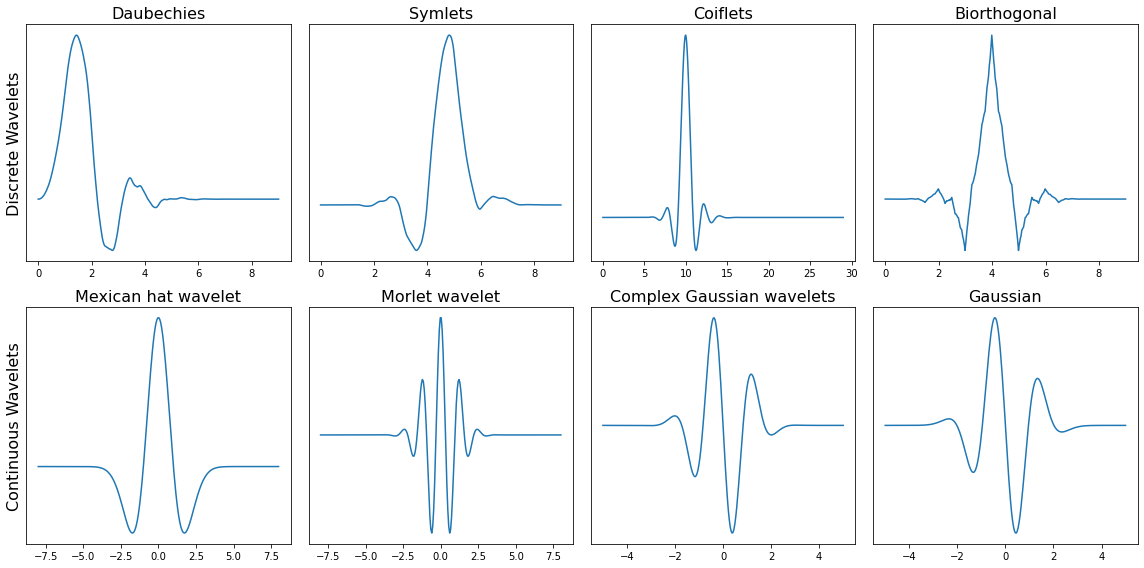

In [26]:

discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])

plt.tight_layout()
plt.show()

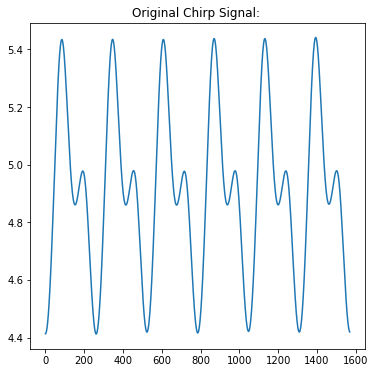

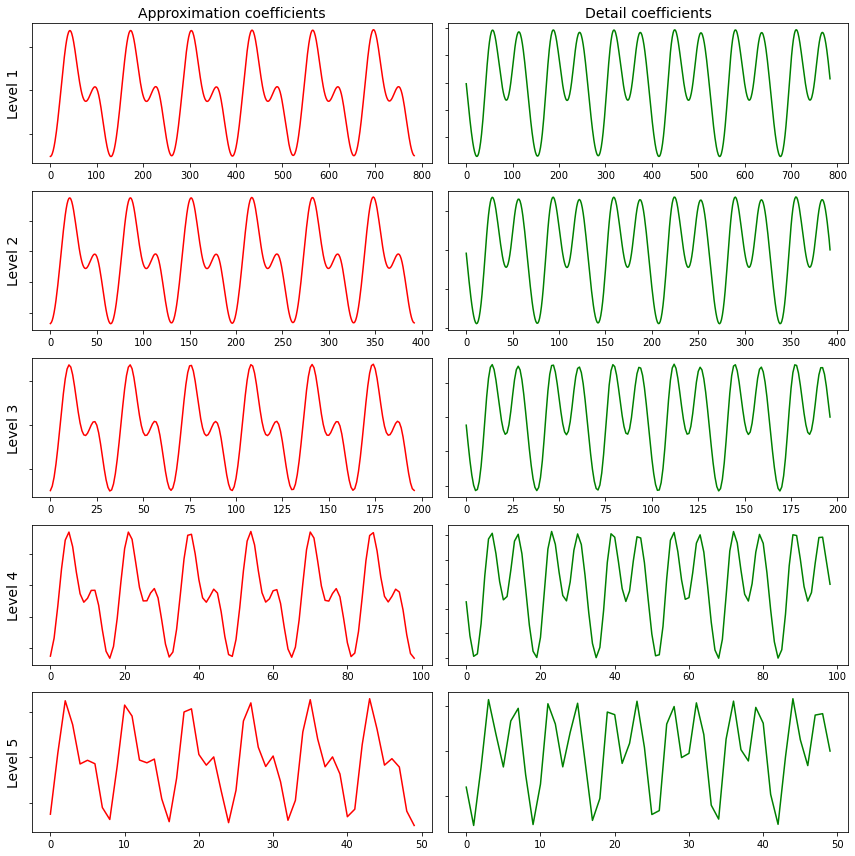

In [27]:
import pywt
# discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
x = np.linspace(0, 1, num=2048)
# chirp_signal = np.sin(250 * np.pi * x**2)
chirp_signal = filt0 
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'haar'

fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(12,12))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

In [28]:
def wavelet_decomposer(signal, wavelet_name, decomposition_level):
#     reconstructed_signal = {}

#     # row signal
#     # reconstructed_signal.append(signal)
#     reconstructed_signal['row'] = signal

    coeffs = pywt.wavedec(signal, wavelet_name, level=decomposition_level)
    
    
    return coeffs

In [29]:
cA3,cD3,*_= wavelet_decomposer(filt0,"haar",3)

In [30]:
cA5,cD5,*_= wavelet_decomposer(filt0,"haar",5)

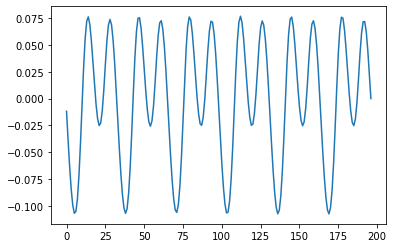

In [31]:
plt.plot(cD3)

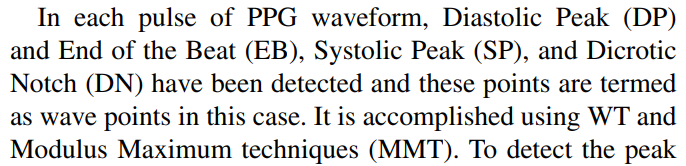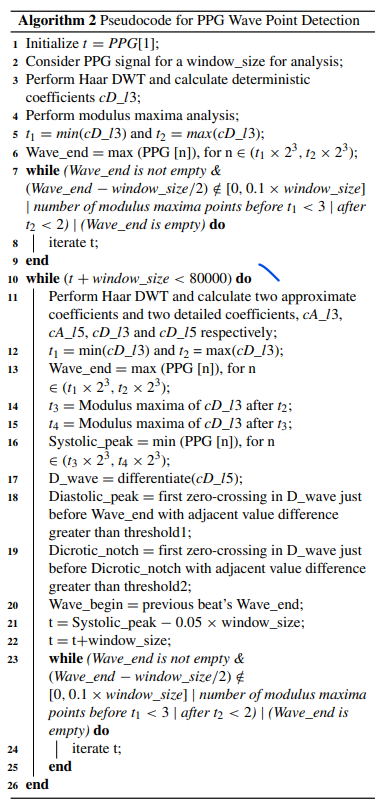

In [32]:
t = np.arange(1600)
t1,t2 = min(cD3),max(cD3)
wave_end  =max(filt0)

In [33]:
t2

0.07683393812572437

In [34]:
while wave_end and (wave_end-t//2) not in [0,0.1*t]:
    

SyntaxError: unexpected EOF while parsing (<ipython-input-34-3871d6e173d3>, line 2)

In [35]:
import array

In [36]:
array([1,2,4])

TypeError: 'module' object is not callable

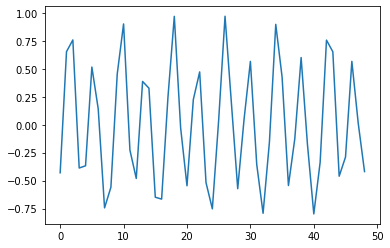

In [37]:
plt.plot(derivate(cD5))

In [38]:
cD5

array([-0.40434462, -0.834244  , -0.18103104,  0.57695649,  0.18955164,
       -0.17810269,  0.33745917,  0.47940636, -0.26444064, -0.82386036,
       -0.3703252 ,  0.53070503,  0.30380576, -0.176906  ,  0.20991638,
        0.53631446, -0.11216946, -0.77761007, -0.5311616 ,  0.43780453,
        0.40819551, -0.13785794,  0.08692384,  0.55905604,  0.04106865,
       -0.71153845, -0.6674741 ,  0.30246237,  0.49939608, -0.07308882,
       -0.02559033,  0.54060561,  0.18520422, -0.60696149, -0.76290462,
        0.13443271,  0.5599575 ,  0.01601998, -0.11072638,  0.48981709,
        0.31261771, -0.48526527, -0.82160199, -0.06521104,  0.58729676,
        0.12668328, -0.16292746,  0.40356575,  0.4193342 ,  0.        ])

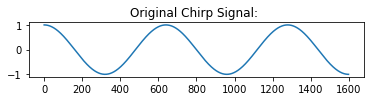

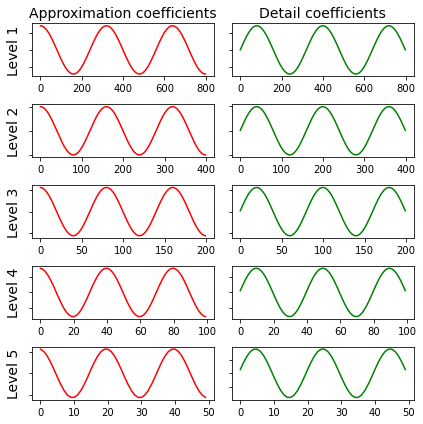

In [39]:

import pywt
 
x = np.linspace(0, 5, 1600)
chirp_signal = np.cos(np.pi*x)
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'haar'
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

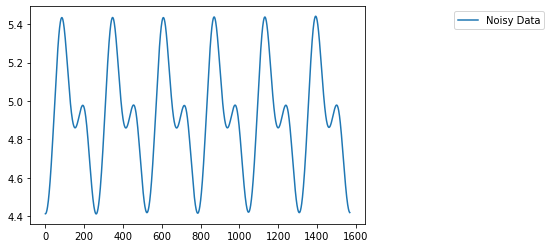

In [40]:
infls = np.where(np.diff(np.sign(filt0)))[0]

# plot results
plt.plot(filt0, label='Noisy Data')
# plt.plot(smooth, label='Smoothed Data')
# plt.plot(smooth_d2 / np.max(smooth_d2), label='Second Derivative (scaled)')
for i, infl in enumerate(infls, 1):
    plt.axvline(x=infl, color='k', label=f'Inflection Point {i}')
plt.legend(bbox_to_anchor=(1.55, 1.0))

In [41]:
infls = np.where(np.diff(np.sign(filt0)))

In [42]:
infls

(array([], dtype=int64),)

In [43]:
np.sign(filt0
       )

array([1., 1., 1., ..., 1., 1., 1.])

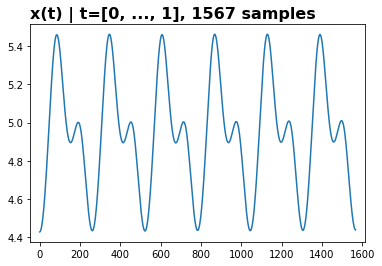

[[-1.08774873e-06-2.6605849e-06j  1.07335973e-06+2.5228119e-06j
  -1.03177570e-06-2.3931616e-06j ... -3.14028352e-06+1.8744968e-06j
   3.26453028e-06-2.2557110e-06j -3.30726266e-06+2.6611920e-06j]
 [-1.68429915e-06-3.6835040e-06j  1.65903066e-06+3.4563518e-06j
  -1.58626949e-06-3.2441494e-06j ... -4.81135612e-06+2.3883390e-06j
   5.02874263e-06-3.0142492e-06j -5.10377504e-06+3.6846777e-06j]
 [-2.48444735e-06-4.7805024e-06j  2.44160856e-06+4.4208527e-06j
  -2.31882336e-06-4.0876889e-06j ... -7.01123463e-06+2.7326132e-06j
   7.37807795e-06-3.7181126e-06j -7.50520212e-06+4.7826843e-06j]
 ...
 [ 7.18399824e-05-4.8847200e-04j  7.34562054e-05-4.8781146e-04j
   7.50683103e-05-4.8714544e-04j ... -1.91537605e-04+3.5552573e-04j
  -1.92902327e-04+3.5529700e-04j -1.94267923e-04+3.5506289e-04j]
 [-1.68018439e-03-3.2376959e-03j -1.67024287e-03-3.2428326e-03j
  -1.66028528e-03-3.2479391e-03j ... -3.36827943e-03+1.3988536e-03j
  -3.37255700e-03+1.3885156e-03j -3.37680243e-03+1.3781640e-03j]
 [-5.38182

In [67]:
import numpy as np
from ssqueezepy import cwt
from ssqueezepy.visuals import plot, imshow



#%%# Make `x` & plot #########################################################
t = xdata
x = filt1
plot(x, title="x(t) | t=[0, ..., 1], %s samples" % len(x), show=1)

#%%# Take CWT & plot #########################################################
Wx, scales =cwt(x, 'morlet')
print(Wx)
imshow(abs(Wx), yticks=scales, abs=1,
       title="abs(CWT) | Morlet wavelet",
       ylabel="scales", xlabel="samples")

In [44]:
np.diff(np.sign(filt0
               ))

array([0., 0., 0., ..., 0., 0., 0.])

In [45]:


def plot_wavelet(time, signal, scales, 
                 waveletname = 'cmor', 
                 cmap = plt.cm.seismic, 
                 title = 'Wavelet Transform (Power Spectrum) of signal', 
                 ylabel = 'Frequency', 
                 xlabel = 'Time'):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    plt.show()
    
    

C:\Users\Abhishek\anaconda3\lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


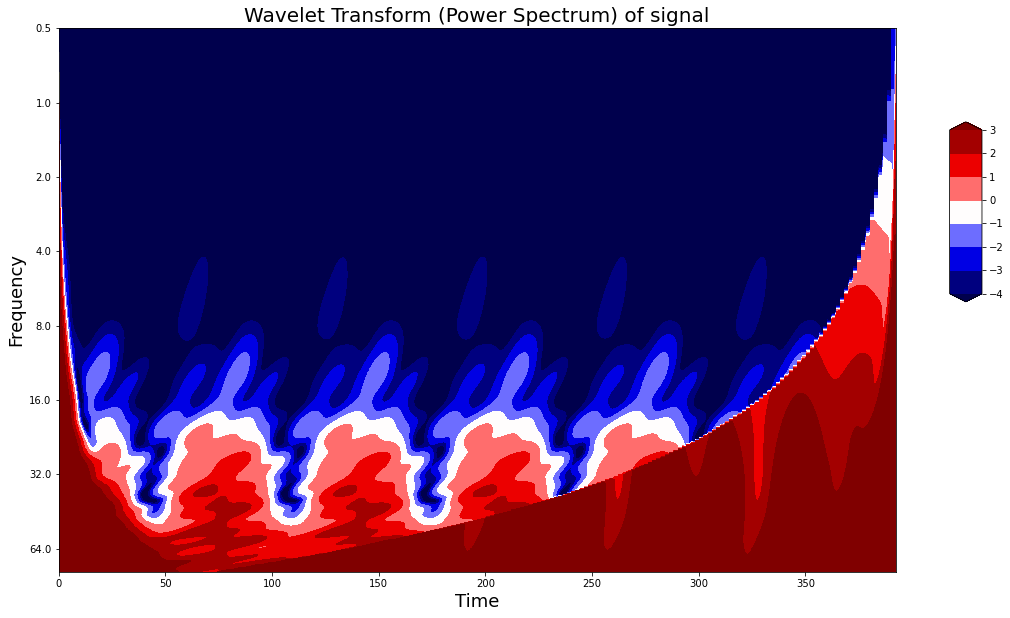

In [46]:
N = filt0.shape[0]
t0=0
dt=0.25
time = np.arange(0, N) * dt + t0
signal = filt0.squeeze()
 
scales = np.arange(1, 160)
plot_wavelet(time, signal, scales)

In [47]:
filt0.shape

(1570,)

In [48]:

# scope3.to_numpy()
xdata = np.array(scope1.iloc[:,0])
xdatanew = (xdata+0.00025)*10000
ydata =np.array(scope1.iloc[:,1])
   
filt0 = butter(2,ydata,250)
filt0 = crop(filt0)

ydata =np.array(scope2.iloc[:,1])
   
filt1 = butter(2,ydata,250)
filt1 = crop(filt1)

ydata =np.array(scope3.iloc[:,1])
   
filt2 = butter(2,ydata,250)
filt2 = crop(filt2)
ydata =np.array(scope4.iloc[:,1])
   
filt3 = butter(2,ydata,250)
filt3 = crop(filt3)


In [65]:
import pywt
import numpy as np
import matplotlib.pyplot as plt


coef,freqs = pywt.cwt(filt0,scales,'morlet')
plt.figure(figsize = (15,10))
plt.imshow(imshow(abs(coef),extent = [0,200,30,1],interpolation ="bilinear",cmap = "bone", yticks=scales, abs=1,
       title="abs(CWT) | Morlet wavelet",
       ylabel="scales", xlabel="samples"))
plt.imshow()

ValueError: Unknown wavelet name 'morlet', check wavelist() for the list of available builtin wavelets.

In [1]:
!pip install kymatio


     ---------------------------------------- 93.2/93.2 kB 1.3 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!python.exe -m pip install --upgrade pip

  Using cached pip-22.2-py3-none-any.whl (2.0 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.1.2
    Uninstalling pip-22.1.2:
      Successfully uninstalled pip-22.1.2


In [4]:
from kymatio.numpy import Scattering2D
scattering = Scattering2D(J=2, shape=(32, 32))

In [5]:
from kymatio.sklearn import Scattering2D

scattering_transformer = Scattering2D(2, (32, 32))

In [6]:
from kymatio.torch import Scattering2D

scattering = Scattering2D(J=2, shape=(32, 32))

In [9]:
!pip install -r requirements.txt


python: can't open file 'setup.py': [Errno 2] No such file or directory


In [13]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating kymatio.egg-info
writing kymatio.egg-info\PKG-INFO
writing dependency_links to kymatio.egg-info\dependency_links.txt
writing requirements to kymatio.egg-info\requires.txt
writing top-level names to kymatio.egg-info\top_level.txt
writing manifest file 'kymatio.egg-info\SOURCES.txt'
reading manifest file 'kymatio.egg-info\SOURCES.txt'
adding license file 'LICENSE.md'
adding license file 'AUTHORS.md'
writing manifest file 'kymatio.egg-info\SOURCES.txt'
installing library code to build\bdist.win-amd64\egg
running install_lib
running build_py
creating build
creating build\lib
creating build\lib\kymatio
copying kymatio\caching.py -> build\lib\kymatio
copying kymatio\datasets.py -> build\lib\kymatio
copying kymatio\jax.py -> build\lib\kymatio
copying kymatio\keras.py -> build\lib\kymatio
copying kymatio\numpy.py -> build\lib\kymatio
copying kymatio\sklearn.py -> build\lib\kymatio
copying kymatio\tensorflow.py -> build\lib\kymatio
cop

C:\Users\Abhishek\anaconda3\lib\site-packages\setuptools\dist.py:531: UserWarning: Normalizing '0.4.0-dev' to '0.4.0.dev0'
  warnings.warn(tmpl.format(**locals()))
C:\Users\Abhishek\anaconda3\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
C:\Users\Abhishek\anaconda3\lib\site-packages\setuptools\command\easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
C:\Users\Abhishek\anaconda3\lib\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(
C:\Users\Abhishek\anaconda3\lib\site-packages\pkg_resources\__init__.py:123: PkgResourcesDeprecationWarning:  is an invalid version and will not be supported in a future release
  warnings.warn

copying build\lib\kymatio\scattering1d\frontend\keras_frontend.py -> build\bdist.win-amd64\egg\kymatio\scattering1d\frontend
copying build\lib\kymatio\scattering1d\frontend\numpy_frontend.py -> build\bdist.win-amd64\egg\kymatio\scattering1d\frontend
copying build\lib\kymatio\scattering1d\frontend\sklearn_frontend.py -> build\bdist.win-amd64\egg\kymatio\scattering1d\frontend
copying build\lib\kymatio\scattering1d\frontend\tensorflow_frontend.py -> build\bdist.win-amd64\egg\kymatio\scattering1d\frontend
copying build\lib\kymatio\scattering1d\frontend\torch_frontend.py -> build\bdist.win-amd64\egg\kymatio\scattering1d\frontend
copying build\lib\kymatio\scattering1d\frontend\__init__.py -> build\bdist.win-amd64\egg\kymatio\scattering1d\frontend
copying build\lib\kymatio\scattering1d\utils.py -> build\bdist.win-amd64\egg\kymatio\scattering1d
copying build\lib\kymatio\scattering1d\__init__.py -> build\bdist.win-amd64\egg\kymatio\scattering1d
creating build\bdist.win-amd64\egg\kymatio\scatter

In [18]:
intervals = [[1,2],[5,3],[3,4],[1,3]]

intervals.sort()

In [19]:
intervals

[[1, 2], [1, 3], [3, 4], [5, 3]]